# Exercise 2

### a) Compute the derivative of the sigmoid function:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Use **Chain Rule**:

$$
\sigma'(z)=\frac{d}{dz}\sigma(z)=\frac{d}{dz}\frac{1}{1 + e^{-z}}\\
\sigma'(z)=\frac{d}{dz}(1 + e^{-z})^{-1}\\
\sigma'(z)=-1 * (1 + e^{-z})^{-2} * e^{-z} * -1\\
\sigma'(z)=\frac{e^{-z}}{(1 + e^{-z})^{2}}\\
$$

### b) Show that the derivative fullfills the equation:
$$\sigma'(z) = \sigma(z).(1-\sigma(z))$$

Reformat the derivative to use $\sigma(z)$:

$$
\sigma'(z)=\frac{e^{-z}}{(1 + e^{-z})^{2}}\\
\sigma'(z)=\frac{e^{-z}}{(1 + e^{-z})*(1 + e^{-z})}\\
\sigma'(z)=\frac{1}{(1 + e^{-z})}*\frac{e^{-z}}{(1 + e^{-z})}\\
\sigma'(z)=\frac{1}{(1 + e^{-z})}*\frac{1+e^{-z}-1}{(1 + e^{-z})}\\
\sigma'(z)=\frac{1}{(1 + e^{-z})}*(\frac{(1+e^{-z})}{(1 + e^{-z})} - \frac{1}{(1 + e^{-z})})\\
\sigma'(z)=\frac{1}{(1 + e^{-z})}*(1 - \frac{1}{(1 + e^{-z})})\\
\sigma'(z) = \sigma(z).(1-\sigma(z))\\
$$

### c) Compute the first and second derivative of ζ(z). Create a plot of ζ.
$$\zeta(z) = -log(\sigma(-z))$$

$$
\sigma(-z) = \frac{1}{1 + e^{z}}\\
\zeta(z) = -log(\frac{1}{1 + e^{z}})\\
\zeta(z) = -(log(1)-log(1 + e^{z}))\\
\zeta(z) = -(0-log(1 + e^{z}))\\
\zeta(z) = log(1 + e^{z})\\
$$

#### First derivative:
$$
\zeta'(z) = \frac{1}{1 + e^z}* e^z * 1 \\
\zeta'(z) = \frac{e^z}{1 + e^z} \\
$$

#### Second derivative:
$$
f = \frac{g}{h}\\
f' = \frac{g'.h-g.h'}{h^2} \\
$$
Applied for $\zeta''(z)$:
$$
\zeta''(z) = \frac{(e^z * (1 + e^z))-(e^z * e^z)} {(1 + e^z)^2} \\
\zeta''(z) = \frac{(e^z + e^{2z})-(e^{2z})} {(1 + e^z)^2} \\
\zeta''(z) = \frac{e^z} {(1 + e^z)^2} \\
$$

In [1]:
import numpy as np

def zeta(x):
    """
    Zeta function zeta = -ln(sigma(-x)) = ln(1 + e^x)

    Arguments:
    x -- array of inputs of size (1,m)
    
    Returns:
    y -- array of outputs of size (1,m)
    """
    
    y = np.log(1 + np.exp(x))
    return y

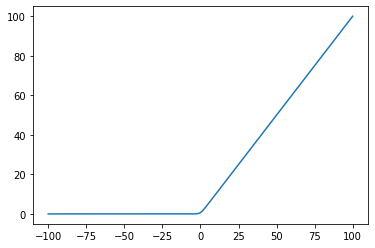

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 200)
y = zeta(x)

plt.plot(x, y)
plt.show()

For $z \to -\infty$:
$$
\lim\limits_{z \to -\infty} \zeta(z) = \lim\limits_{z \to -\infty}log(1 + e^{z})=0\\
$$
For $z \to \infty$:
$$
\lim\limits_{z \to \infty} \zeta(z) = \lim\limits_{z \to \infty}log(1 + e^{z})=\infty\\
$$
Consider limit of $\zeta(z)/z$:
$$
\lim\limits_{z \to \infty} \frac {\zeta(z)}{z} = \lim\limits_{z \to \infty} \frac {log(1 + e^{z})}{z}=1\\
$$

Asymptotes: 
- y = 0
- y = x

In [3]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
  
def softplus(z):
  return -np.log(sigmoid(-z))

def rectifier(z):
  return np.maximum(0,z)

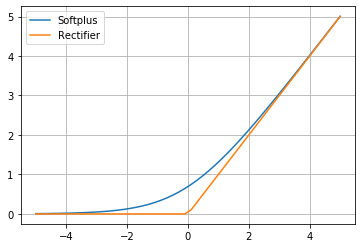

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)

plt.plot(x, softplus(x))
plt.plot(x, rectifier(x))
plt.legend(['Softplus', 'Rectifier'])

plt.grid()
plt.show()

### d) Sigmoid function and its derivative: 
Implement the sigmoid function in a Jupyter Notebook. Make it work such that you can
pass numpy arrays of arbitrary shape and the function is applied element-wise. Plot the
sigmoid function and its derivative by using matplotlib.

In [5]:
import numpy as np

def sigmoid(x):
    """
    Sigmoid function sigma = 1/(1 + e^-x)

    Arguments:
    x -- array of inputs of size (1,m)
    
    Returns:
    y -- array of outputs of size (1,m)
    """
    
    y = 1 / (1 + np.exp(-x))
    return y

def d_sigmoid(x):
    """
    Derivative of sigmoid function dsigma = sigma(x)*(1-sigma(x))

    Arguments:
    x -- array of inputs of size (1,m)
    
    Returns:
    y -- array of outputs of size (1,m)
    """
    
    y = sigmoid(x)*(1 - sigmoid(x))
    return y
    

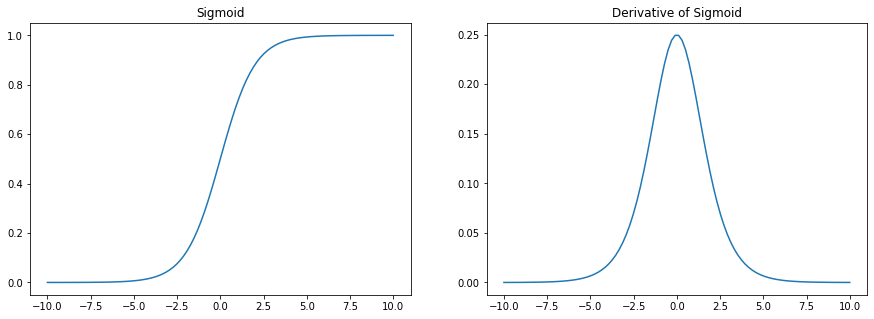

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x, y)
plt.title('Sigmoid')

y1 = d_sigmoid(x)
plt.subplot(1,2,2)
plt.plot(x, y1)
plt.title('Derivative of Sigmoid')
plt.show()

### e) No exercise 

### f) Non-convex function: 
Show that the function
c1(x) = (σ(x) − 1)**2
is non-convex.
Explain in which situations (initial settings) optimising c1(x) with gradient descent may
become difficult. For the explanation create a plot. Note that this exercise should give an
intuition on why mean-square error loss is less suited for classification problems.


$$
c_1(x) =(\sigma(x)-1)^2
$$

In [7]:
def c1(x):
    """
    Function c1 from exercise 2f

    Arguments:
    x -- array of inputs of size (1,m)
    
    Returns:
    y -- array of outputs of size (1,m)
    """
    
    y = (sigmoid(x)-1)**2
    return y

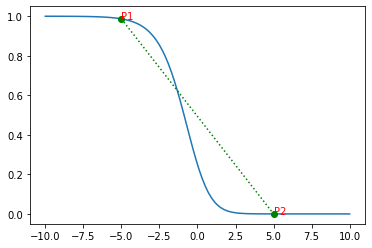

In [8]:
x = np.linspace(-10, 10, 100)
y = c1(x)

x1 = np.array([-5, 5])
y1 = c1(x1)

plt.plot(x, y)
plt.plot(x1, y1, 'g', linestyle=':', marker='o')
plt.text(x1[0], y1[0], 'P1', color='r')
plt.text(x1[1], y1[1], 'P2', color='r')
plt.show()

#### Show that the function $c_1(x) =(\sigma(x)-1)^2$ is non-convex:
Demonstrating, that the function c1(x) is non-convex graphically is trivial. In the plot above, two points (P1 and P2) around the sattle-point (Around approximately x=-1) are connected by a green-dotted line. If the function c1(x) would be convex, then no point of the blue c1(x) curve would be above the green-dotted line. This is not the case, hence c1(x) is non-convex.


#### Explain in which situations (initial settings) optimising c1(x) with gradient descent may become difficult.
The gradient descent algorithm xk+1=xk−λ∇f(xk) works best, if there is a significant gradient ∇f(xk) around the local point to be optimized. Regarding the function c1(x), this is the case for the range between -4 and 2. It can be observed in the figure above, that the gradient of c1(x) tends to go towards 0, if the x value gets very small (Smaller than -4) or very large (larger than 2). Hence, the stepsize of the gradient descent algorithm approaches 0 and gets (nearly) stuck. This kind of problem is called "The vanishing gradient" problem.

### g) Compute the first and second derivative of the function: 
$$
c_2(x)=-(y.log(\sigma(w.x))+(1-y).log(1-\sigma(w.x)))
$$

### First derivative:
Use **Chain-** and **Sum-Rules**:
#### Separate in a and b:
$$
a = y.log(\sigma(w.x))=y.log(\frac{1}{1+e^{-w.x}})\\
b = (1-y).log(1-\sigma(w.x))=(1-y).log(1-\frac{1}{1+e^{-w.x}})\\
$$

#### Derivative a:
$$
a' = y. \frac{1}{\frac{1}{1+e^{-w.x}}}.-1.(1+e^{-w.x})^{-2}.e^{-w.x}.-w\\
a' = \frac{y.w.e^{-w.x}}{1+e^{-w.x}}\\
$$

#### Derivative b:
$$
b' = (1-y). \frac{1}{1- \frac{1}{1+e^{-w.x}}} .-1.-1.(1+e^{-w.x})^{-2} .e^{-w.x}.-w\\
b' = (1-y). \frac{1}{\frac{1+e^{-w.x}-1}{1+e^{-w.x}}}.(1+e^{-w.x})^{-2}.-w.e^{-w.x}\\
b' = (1-y). \frac{1+e^{-w.x}}{e^{-w.x}}.\frac{-w.e^{-w.x}}{(1+e^{-w.x})^2}\\
b' = (1-y). \frac{-w}{1+e^{-w.x}}\\
$$

#### Derivative $c_2$:
$$
c'_2 = -(a'+b')\\
c'_2 = -( \frac{y.w.e^{-w.x}}{1+e^{-w.x}} + (1-y). \frac{-w}{1+e^{-w.x}} )\\
c'_2 = -( \frac{y.w.e^{-w.x}}{1+e^{-w.x}} + \frac{-w}{1+e^{-w.x}} - \frac{-w.y}{1+e^{-w.x}} )\\
c'_2 = -( \frac{y.w.e^{-w.x}-w+w.y}{1+e^{-w.x}})\\
c'_2 = -( \frac{y.w.e^{-w.x}-w+w.y}{1+e^{-w.x}})\,\times\,\frac{e^{w.x}}{e^{w.x}}\\
c'_2 = -( \frac{y.w-w.e^{w.x}+w.y.e^{w.x}}{e^{w.x}+1})\\
c'_2 = \frac{-w.(y-e^{w.x}+y.e^{w.x})}{e^{w.x}+1}\\
c'_2 = \frac{-w.(y+(y-1).e^{w.x})}{e^{w.x}+1}\\
$$

### Second derivative:
Use **Quotient-Rule**:
$$
c''_2 = - (\frac{(w.(y-1).w.e^{w.x}.(e^{w.x}+1)) - (w.(y+(y-1).e^{w.x}).w.e^{w.x})} {(e^{w.x}+1)^2})\\
c''_2 = - (\frac{w.e^{w.x}.(w.(y-1).e^{w.x}+w.(y-1)-w.y-w.(y-1).e^{w.x})} {(e^{w.x}+1)^2})\\
c''_2 = - (\frac{w.e^{w.x}.(w.(y-1)-w.y)} {(e^{w.x}+1)^2})\\
c''_2 = - (\frac{w.e^{w.x}.(-w)} {(e^{w.x}+1)^2})\\
c''_2 = \frac{w^2.e^{w.x}} {(e^{w.x}+1)^2}\\
$$

#### Show that c2 is convex for x != 0

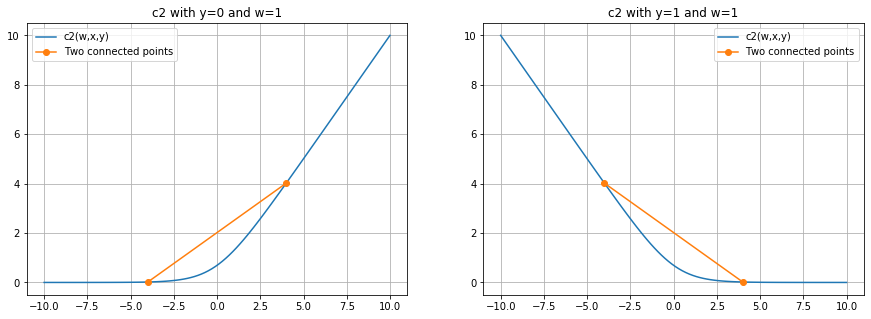

In [9]:
def c2(w,x,y):
  return -(y*np.log(sigmoid(w*x))+(1-y)*np.log(1-sigmoid(w*x)))

plt.figure(figsize=(15,5))

# c2 with y=0 and w=1 (Just a scaling factor)
plt.subplot(1,2,1)
plt.plot(x, c2(1,x,0))
plt.title('c2 with y=0 and w=1')
plt.grid()

# straight line to proove the function c2 with y=0 to be convex
x1 = -4
x2 = 4
p1 = [x1, c2(1,x1,0)]
p2 = [x2, c2(1,x2,0)]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'o-')
plt.legend(['c2(w,x,y)', 'Two connected points'])

# c2 with y=1 and w=1 (Just a scaling factor)
plt.subplot(1,2,2)
plt.plot(x, c2(1,x,1))
plt.title('c2 with y=1 and w=1')
plt.grid()

# straight line to proove the function c2 with y=1 to be convex
x1 = -4
x2 = 4
p1 = [x1, c2(1,x1,1)]
p2 = [x2, c2(1,x2,1)]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'o-')
plt.legend(['c2(w,x,y)', 'Two connected points'])

plt.show()

Given an orange line of any two connected points in the blue function c2(w,x,y), all points of c2(w,x,y) lie underneath the line. Hence, the function c2(w,x,y) is convex.

#### Another point of view:

In [10]:
#Compute second derivative
def dd_c2(w, x):
    """
    Second derivative of c2

    Arguments:
    w -- array of inputs of size (1,m)
    x -- array of inputs of size (1,m)
    
    Returns:
    y -- array of outputs of size (1,m)
    """
    
    y = (w**2)*np.exp(w*x)/ (np.exp(w*x) + 1)**2
    return y

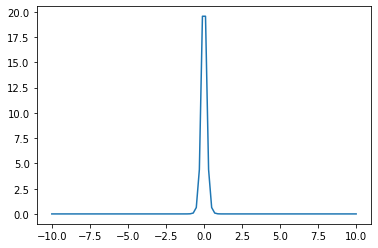

In [11]:
x = np.linspace(-10, 10, 100)
w = -10
y = dd_c2(w, x)

plt.plot(x, y)
plt.show()

Second derivative is non-negative, this function should be convex.